# DATOS DE PLANETAS

In [1]:
import seaborn as sb

In [3]:
planetas=sb.load_dataset('planets')
planetas.shape

(1035, 6)

In [4]:
planetas.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
planetas.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [7]:
import pandas as pd

In [8]:
planetas.distance.sum()

213367.98000000004

## DEFINICIÓN FORMAL DE LA DESVIACIÓN MEDIA ABSOLUTA (MAD)

$$\frac{\sum_{i=1}^{n}|x_i -{\bar{x}|}}{n}$$

In [9]:
planetas.distance.mad()#Desviación media absoluta

318.100885452407

In [10]:
planetas.distance.var()#Varianza

537459.7922212934

In [11]:
planetas.distance.std()#Desviación estandard

733.1164929404422

In [12]:
planetas.groupby('method')['orbital_period'].median()#columnas

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [13]:
for(method,group) in planetas.groupby('method'):
    print("{0:30s} shape={1}".format(method,group.shape))#Obtenemos la cantidad de veces usadas el método usado 

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [14]:
planetas.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [19]:
decada=10*(planetas['year']//10)
decada=decada.astype(str)+'s'

In [20]:
decada.name="Decada"

In [21]:
planetas.groupby(['method',decada])['number'].sum()#DATOS APILADOS

method                         Decada
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [23]:
planetas.groupby(['method',decada])['number'].sum().unstack().fillna(0)#DATOS BONITOS

Decada,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# DIAGRAMAS DE CAJA CON PYTHON BOXPLOT

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
np.random.seed(19880519)

In [27]:
dist1=100*np.random.rand(50)
dist2=50*np.ones(25)
dist3=100+100*np.random.rand(10)
dist4=-100*np.random.rand(10)
data=np.concatenate((dist1,dist2,dist3,dist4))

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9cfb73af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9cfb5b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9cfb736a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9cfb5bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9cfb510a0>],
 'means': []}

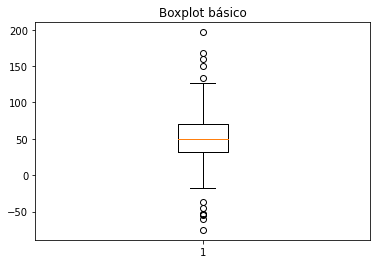

In [28]:
fig1,ax1=plt.subplots()
ax1.set_title("Boxplot básico")
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d10437c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d1043f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d1043340>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d104c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d104f8b0>],
 'means': []}

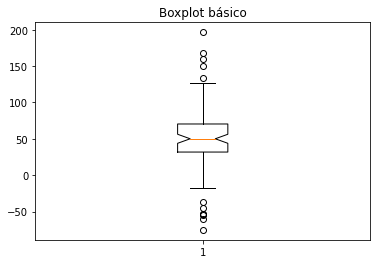

In [30]:
fig2,ax2=plt.subplots()
ax2.set_title("Boxplot básico")
ax2.boxplot(data,notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d13c3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d13d3340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d13c3940>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d13d3a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d13d3d60>],
 'means': []}

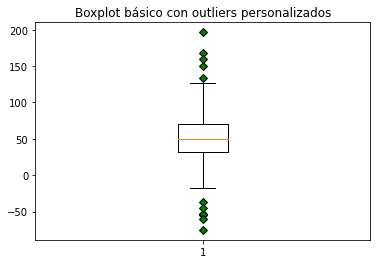

In [32]:
#PARA HACER QUE TENGAN UNA FIGURA EN ESPECÍFICO
greendiamonds=dict(markerfacecolor="g",marker="D")
fig3,ax3=plt.subplots()
ax3.set_title("Boxplot básico con outliers personalizados")
ax3.boxplot(data,flierprops=greendiamonds)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d14b0af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d14c71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d14b3070>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d14c7970>],
 'fliers': [],
 'means': []}

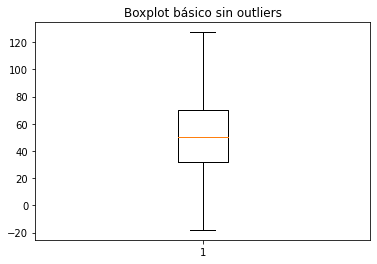

In [33]:
#PARA HACER QUE TENGAN UNA FIGURA EN ESPECÍFICO
fig4,ax4=plt.subplots()
ax4.set_title("Boxplot básico sin outliers")
ax4.boxplot(data,showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d26f6f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d2703670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d26f6c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d2703d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d2711100>],
 'means': []}

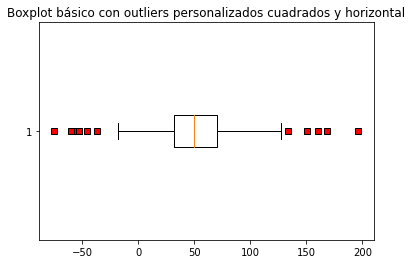

In [39]:
#PARA HACER QUE TENGAN UNA FIGURA EN ESPECÍFICO
red_square=dict(markerfacecolor="r",marker="s")
fig5,ax5=plt.subplots()
ax5.set_title("Boxplot básico con outliers personalizados cuadrados y horizontal")
ax5.boxplot(data,flierprops=red_square,vert=False,whis=1.5)

In [73]:
dist1=100*np.random.rand(50)
dist2=40*np.ones(25)
dist3=100+100*np.random.rand(10)
dist4=-100*np.random.rand(10)
data2=np.concatenate((dist1,dist2,dist3,dist4))

In [77]:
data.shape=(-1,1)#PARA CONVERTIRLO EN UN ARRAY BIDIMENSIONAL
data2.shape=(-1,1)#PARA CONVERTIRLO EN UN ARRAY BIDIMENSIONAL

In [80]:
fulldata=[data.flatten(),data2.flatten(),data2[::2,0]]#primer columna data, segunda data2, tercera uno si uno no de data 2

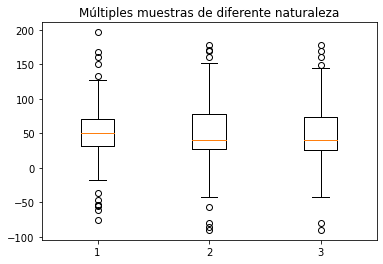

In [81]:
fig7,ax7=plt.subplots()
ax7.set_title("Múltiples muestras de diferente naturaleza")
ax7.boxplot(fulldata)
plt.show()


# NOTAS

* En un diagrama de caja y bigote no aparece representado __la media__
* El rango intercuartílico __no es una medida de centralización__
* Hay muchísimas formas de calcular la media, en función del parámetro
* La __varianza no tiene las mismas medidas__ que los datos originales
* Un dato es considerado outlier en un diagrama de caja si __se aleja más de 1.5 veces el rango intercuartilico del primer o tercer cuartil__